# What has Happened to my Patient since I last saw them?
- Generate Notes ( in generate_list_of_doctors_notes)

Workflow:  
- Get the notes from central repository
- Store in dictionary





In [1]:
import random
import datetime

import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


import os
import re
import openai
import webbrowser
# import datetime 
# from datetime import datetime
import json
from json import loads, dumps
from docx import Document

import csv


import ast 
import subprocess
# from CSV_to_JSON_or_DICT import CSV_to_DICT


from chatGPT_utilities import setup_OpenAI_API
# from chatGPT_utilities import write_prompt_and_response_DOCX
from chatGPT_utilities import json_to_dict
from chatGPT_utilities import pp_json
from chatGPT_utilities import get_completion
from chatGPT_utilities import get_completion_from_messages_FULL
from chatGPT_utilities import get_completion_from_messages_FULL_and_costs
from chatGPT_utilities import get_completion_from_messages
from chatGPT_utilities import read_file
from chatGPT_utilities import token_usage
from chatGPT_utilities import print_token_usage
from chatGPT_utilities import openai_object_to_dict
from chatGPT_utilities import read_patient_notes



# from chatGPT_utilities import replace_with_bold_red
# from chatGPT_utilities import write_to_file
# from chatGPT_utilities import capitalize_all_letters
# from chatGPT_utilities import color_code_clinic_note
# from chatGPT_utilities import convert_response_STR_to_DICT
# from chatGPT_utilities import highlight_text


openai.api_key = setup_OpenAI_API()
starting_directory = os.getcwd()
# url_chatGPT_usage = 'https://platform.openai.com/account/usage'
# _ = webbrowser.open_new(url_chatGPT_usage)



from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"



random.seed(42)  # Set the random seed for reproducibility

# doctors = ["Dr. AA", "Dr. Bn", "Dr. C", "Dr. G"]
# dates = []
# start_date = datetime.date(2023, 1, 1)
# end_date = datetime.date(2023, 12, 31)

# for _ in range(len(doctors)):
#     random_date = start_date + datetime.timedelta(days=random.randint(0, (end_date - start_date).days))
#     dates.append(random_date)

# doctors_dict = dict(zip(doctors, dates))
# for k,v in doctors_dict.items():
#     print(f'{k:20}   {v}')


# Globals

In [2]:
color_map = {
    "Doctor_1": "Red",
    "Doctor_2": "Blue",
    "Doctor_3": "Green",
    "Doctor_4": "Black",
    "Doctor_5": "Orange",
    "Doctor_6": "Purple",
    "Doctor_7": "Pink",
    "Doctor_8": "Cyan",
    "Doctor_9": "Magenta",
    "Doctor_10": "Lime"
}
random.seed(42)

# Functions
- Who Are The Doctors

In [3]:
# from what_happened_utils import who_are_the_Doctors
from what_happened_utils import create_doctor_date_dataframe
from what_happened_utils import generate_list_of_doctors_notes

In [4]:


# Example usage:
# doctors_list = [
#     {
#         "Name": "Doctor_1",
#         "Notes": [
#             {"Date": datetime.date(2023, 3, 1), "Note_contents": "Some note"},
#             {"Date": datetime.date(2023, 4, 15), "Note_contents": "Some note"},
#             {"Date": datetime.date(2023, 6, 20), "Note_contents": "Some note"}
#         ]
#     },
#     {
#         "Name": "Doctor_2",
#         "Notes": [
#             {"Date": datetime.date(2023, 2, 5), "Note_contents": "Some note"},
#             {"Date": datetime.date(2023, 5, 10), "Note_contents": "Some note"},
#             {"Date": datetime.date(2023, 7, 5), "Note_contents": "Some note"}
#         ]
#     }
# ]

# df = create_doctor_date_dataframe(dict_of_notes, doctors_list)
# print(df)

# Read into Dictionary from Tuples

# Create Dictionary From Tuples

In [5]:
def display_dict_by_doctor_date_note(dictionary):  
    print('in display_dict_by_doctor_date_note')
    stop
    print(dictionary)
    for doctor,v in dictionary.items():
        print('\n'*2 ) 
        print(doctor)
        # print(dictionary[k])
        list_of_notes = dictionary[doctor]['notes']
        dates = [item['date'] for item in (list_of_notes)]

        print('list_of_notes')
        print(list_of_notes)
        sorted_dates = sorted(dates)
        for num, date_of_note in enumerate(sorted_dates, start=1): 
            list_of_SINGLE_date = [i['date'] for i in list_of_notes if i['date'] == date_of_note]
            assert isinstance(list_of_SINGLE_date,list), 'Date should be in a list on ONE'
            assert len(list_of_SINGLE_date) == 1, 'There should only be ONE note for the date ' + date_of_note
            print("{0:3}: {1} {2}".format(num, date_of_note, doctor))
            note_contents  = [i['content'] for i  in list_of_notes if i['date'] ==date_of_note ]
            assert len(note_contents) == 1, 'There should only be ONE note for the date ' + date_of_note
            print(f'\t\t{note_contents[0]}')
        print('\n'*2 )  
    return


## Create Dictionary From Tuples - do I need this?


In [6]:
def create_dictionary_from_tuples(tuple_list):
    stop
    result_dict = {}
    for item in tuple_list:
        name, notes = item
        if name in result_dict:
            result_dict[name]['notes'].append({'date': notes[0], 'content': notes[1]})
        else:
            result_dict[name] = {'notes': [{'date': notes[0], 'content': notes[1]}]}
    return result_dict


    
# Example usage:
tuples = [('John', ('2023-07-10', 'Meeting with client')),
          ('Alice', ('2023-07-09', 'Prepare presentation')),
          ('Bob', ('2023-07-11', 'Review JULY project documentation')),
          ('Bob', ('2023-06-11', 'Review JUNE project documentation')),
          ('John', ('2023-07-12', 'Follow-up email'))]

dictionary = create_dictionary_from_tuples(tuples)
display_dict_by_doctor_date_note(dictionary)





for name, (date, description) in tuples:
    filename = f"{date}.txt"
    with open(filename, 'w') as file:
       _ =  file.write(f"Doctor: {name}\n{description}")
    print(f'Writing{filename}')
  

NameError: name 'stop' is not defined

## Create Dictionary From Tuples READ - but not used right now


In [7]:
      
        

def create_dictionary_from_tuples_READ(tuple_list):
    print(f'in create_dictionary_from_tuples_READ')
    stop
    result_dict = {}
    for item in tuple_list:
        name, notes = item
        if name in result_dict:
            result_dict[name]['notes'].append({'date': notes[0], 'content': notes[1]})
        else:
            result_dict[name] = {'notes': [{'date': notes[0], 'content': notes[1]}]}
    return result_dict

    
# Example usage:
tuples = [('John', ('2023-07-10', 'Meeting with client')),
          ('Alice', ('2023-07-09', 'Prepare presentation')),
          ('Bob', ('2023-07-11', 'Review JULY project documentation')),
          ('Bob', ('2023-06-11', 'Review JUNE project documentation')),
          ('John', ('2023-07-12', 'Follow-up email'))]

dictionary = create_dictionary_from_tuples(tuples)
display_dict_by_doctor_date_note(dictionary)


for name, (date, description) in tuples:
    filename = f"{date}.txt"
    with open(filename, 'w') as file:
        file.write(f"Doctor: {name}\n{description}")

NameError: name 'stop' is not defined

In [8]:
# commented out July 12, 2023 5:09 PM 
# print(dictionary)
# for doctor,v in dictionary.items():
#     print('\n'*2 ) 
#     print(doctor)
#     # print(dictionary[k])
#     list_of_notes = dictionary[doctor]['notes']
#     dates = [item['date'] for item in (list_of_notes)]

#     print('list_of_notes')
#     print(list_of_notes)
#     sorted_dates = sorted(dates)
#     for num, date_of_note in enumerate(sorted_dates, start=1): 
#         list_of_SINGLE_date = [i['date'] for i in list_of_notes if i['date'] == date_of_note]
#         assert isinstance(list_of_SINGLE_date,list), 'Date should be in a list on ONE'
#         assert len(list_of_SINGLE_date) == 1, 'There should only be ONE note for the date ' + date_of_note
#         print("{0:3}: {1} {2}".format(num, date_of_note, doctor))
#         note_contents  = [i['content'] for i  in list_of_notes if i['date'] ==date_of_note ]
#         assert len(note_contents) == 1, 'There should only be ONE note for the date ' + date_of_note
#         print(f'\t\t{note_contents[0]}')
#     print('\n'*2 )  
    
    
    
    

# Read and parse notes from patient notes file
 <div class="alert alert-block alert-success">
    This is the real thing
    

</div>

In [9]:
def extract_clinical_data(file_path):
    """
    : Input   : file path
    : Output  : clinical_notes, file_content
    Description of what the function does.
       Date_and_Note_content  =  {"Date": date, 
                                       "Note_content" : note}
            clinical_data = {
                "Doctor": doctor,
                "Date_and_Note_content" : Date_and_Note_content}

    """

    
    
    with open(file_path, 'r') as file:
        file_content = file.read()
    clinical_notes = []
    start_marker = "Patient Information:"
    end_marker   = "Chief Complaint:"

    # while start_marker in file_content and end_marker in file_content:
    if start_marker in file_content and end_marker in file_content:
        start_index = file_content.index(start_marker) + len(start_marker)
        end_index = file_content.index(end_marker)
        # print(start_index, end_index)
        note = file_content[start_index:end_index].strip()
        # note = file_content[end_index:].strip()

        doctor_pattern = r"Doctor\s*:\s*(.*)"
        date_pattern = r"Date of Visit\s*:\s*(.*)"
        complaint_pattern = r"Chief Complaint\s*:\s*(.*)"
        gender_pattern = r"Gender\s*:\s*(.*)"

        doctor_match = re.search(doctor_pattern, note, re.IGNORECASE)
        date_match = re.search(date_pattern, note, re.IGNORECASE)
        complaint_match = re.search(complaint_pattern, note, re.IGNORECASE)
        gender_match = re.search(gender_pattern, note, re.IGNORECASE)
        # print(f'doctor_match{doctor_match}')
        # print(f'date_match{date_match}')
        # print(f'gender_match{gender_match}')
        
        clinical_data = []
        if doctor_match and date_match: # and gender_match:
            doctor = doctor_match.group(1).strip()
            date = date_match.group(1).strip()
            # complaint = complaint_match.group(1).strip()
            # gender = gender_match.group(1).strip()
            Date_and_Note_content  =  {"Date": date, 
                                       "Note_content" : note}
            clinical_data = {
                "Doctor": doctor,
                "Date_and_Note_content" : Date_and_Note_content
                
            }
                    # "Gender": gender
            # clinical_notes.append(clinical_data)
        # file_content = file_content[end_index + len(end_marker):]
        
    return clinical_data

In [10]:
#     dict_of_notes = {}

#     print('Current Directory:',os.getcwd())
#     pt_notes_dir = 'John_Smith_Notes'

#     list_of_files_with_notes = [i for i in os.listdir(pt_notes_dir) if i.endswith('txt') and \
#                                 # i.startswith('John_Smith')]
#     the_dir_of_notes =  pt_notes_dir.replace('_',' ')
#     print(f'Reading the following files from "{the_dir_of_notes}" :')
#     for num, name in enumerate(list_of_files_with_notes, start=1): 
#         print("{0:3}: {1}".format(num, name))
 
#     for file_with_note in list_of_files_with_notes:
#         print(f'\n\nReading {file_with_note}')
#         clinical_data_dict  = extract_clinical_data(os.path.join(os.getcwd(),
#                                                    pt_notes_dir, file_with_note))
        
        
#         Doctor = clinical_data_dict['Doctor'] 
#         Date = clinical_data_dict['Date_and_Note_content']['Date']  
#         Note_content = clinical_data_dict['Date_and_Note_content']['Note_content']  
#         # print(patient_visit_note)
#         # print(f'{Doctor}  {Date}')
#         # print(f'Note_content\n\t{Note_content}')
# # for clinical_data in clinical_data_list:
# #     print(clinical_data)
#     # for item in tuple_list:
#     #     name, notes = item
#         print(f'Doctor in dict_of_notes is  {Doctor in dict_of_notes}')
#         if Doctor in dict_of_notes:
#             dict_of_notes[Doctor]['notes'].append({'date': datetime.datetime.strptime(Date, "%b %d, %Y").date(), 'content': Note_content})
#         else:
#             dict_of_notes[Doctor] = {'notes': [{'date': datetime.datetime.strptime(Date, "%b %d, %Y").date(), 'content': Note_content}]}
  

In [11]:
pt_notes_dir = 'John_Smith_Notes'

In [13]:

def read_notes(Dir_Notes, 
               patient_name = 'John_Smith'):
    """
    : Input   :
    : Output  :
    By convention, directory i snamed John_Smith_Notes 
    """

    

    dict_of_notes = {}

    print('Current Directory:',os.getcwd())
    assert os.getcwd() == starting_directory  ,'Not in start directory'
    # pt_notes_dir = 'John_Smith_Notes'

    list_of_files_with_notes = [i for i in os.listdir(Dir_Notes)\
                                if i.endswith('txt') and \
                                i.startswith(patient_name)]
    the_dir_of_notes =  pt_notes_dir.replace('_',' ')
    print(f'Reading the following files from "{the_dir_of_notes}" :')
    for num, name in enumerate(list_of_files_with_notes, start=1): 
        print("{0:3}: {1}".format(num, name))
 
    for file_with_note in list_of_files_with_notes:
        print(f'\n\nReading {file_with_note}')
        clinical_data_dict  = extract_clinical_data(os.path.join(os.getcwd(),
                                                   pt_notes_dir, file_with_note))
        
        
        Doctor = clinical_data_dict['Doctor'] 
        Date = clinical_data_dict['Date_and_Note_content']['Date']  
        Note_content = clinical_data_dict['Date_and_Note_content']['Note_content']  
        # print(patient_visit_note)
        # print(f'{Doctor}  {Date}')
        # print(f'Note_content\n\t{Note_content}')
# for clinical_data in clinical_data_list:
#     print(clinical_data)
    # for item in tuple_list:
    #     name, notes = item
        
        if Doctor in dict_of_notes:
            dict_of_notes[Doctor]['Notes'].append(\
                    {'Date':  datetime.datetime.strptime(Date, "%b %d, %Y").date(),\
                     'Content': Note_content})
        else:
            print(f'Creating a new entry for Doctor {Doctor}')
            dict_of_notes[Doctor] = {'Notes': \
                                [{'Date': datetime.datetime.strptime(Date, "%b %d, %Y").date(), \
                                  'Content': Note_content}]}
    return dict_of_notes

In [14]:
pt_notes_dir = 'John_Smith_Notes'
dict_of_notes =read_notes(pt_notes_dir)

Current Directory: /Users/michael/Coding
Reading the following files from "John Smith Notes" :
  1: John_Smith_2023_02_02.txt
  2: John_Smith_2023_03_30.txt
  3: John_Smith_2023_01_30.txt
  4: John_Smith_2023-07-11.txt
  5: John_Smith_2023_06_30.txt


Reading John_Smith_2023_02_02.txt
Creating a new entry for Doctor Doctor_2


Reading John_Smith_2023_03_30.txt
Creating a new entry for Doctor Doctor_3


Reading John_Smith_2023_01_30.txt
Creating a new entry for Doctor Doctor_5


Reading John_Smith_2023-07-11.txt
Creating a new entry for Doctor Doctor_1


Reading John_Smith_2023_06_30.txt


In [15]:
for k,v in dict_of_notes.items():
    print(k)
    print('Notes')
    print(dict_of_notes[k]['Notes'])
    print()
        
# comeback

Doctor_2
Notes
[{'Date': datetime.date(2023, 2, 2), 'Content': 'Name: John Smith\nDoctor : Doctor_2\nAge: 62\nGender: Male\nDate of Visit: Feb 2, 2023'}]

Doctor_3
Notes
[{'Date': datetime.date(2023, 3, 30), 'Content': 'Name: John Smith\nDoctor : Doctor_3\nAge: 62\nGender: Male\nDate of Visit: Mar 30, 2023'}, {'Date': datetime.date(2023, 6, 30), 'Content': 'Name: John Smith\nDoctor : Doctor_3\nAge: 62\nGender: Male\nDate of Visit: Jun 30, 2023'}]

Doctor_5
Notes
[{'Date': datetime.date(2023, 1, 1), 'Content': 'Name: John Smith\nDoctor : Doctor_5\nAge: 62\nGender: Male\nDate of Visit: Jan 1, 2023'}]

Doctor_1
Notes
[{'Date': datetime.date(2023, 7, 11), 'Content': 'Name: John Smith\nDoctor : Doctor_1\nAge: 62\nGender: Male\nDate of Visit: Jul 11, 2023'}]



In [16]:
list_of_Doctors = list(dict_of_notes.keys())
list_of_Doctors.sort()
list_of_Doctors

['Doctor_1', 'Doctor_2', 'Doctor_3', 'Doctor_5']

# Find Content By Date

In [17]:
def find_content_by_date(my_dict, search_date):
    # print('in find_content_by_date')
    notes = my_dict.get('Notes', [])
    for note in notes:
        if note.get('Date') == search_date:
            return note.get('Content')
    return None

In [18]:
print('\033[91m'+ '\033[1m' + 'Red'+ '\033[0m')
print('\033[92;1m' + 'GREEN' + '\033[0m')
print('\033[38;5;94;1m' + 'Brown' + '\033[0m')
print('\033[38;5;18;1m' + 'Blue' + '\033[0m')
print('\033[38;5;208;1m' + 'Orange' + '\033[0m')
print('\033[255;0;0;1m' + 'Black' + '\033[0m')


Red
GREEN
Brown
Blue
Orange
Black


In [19]:
patient = 'John Smith'

In [20]:
def Display_Notes(dict_of_notes) :
    for Doctor in list_of_Doctors:

        print('\033[91m'+ '\033[1m' + Doctor+ '\033[0m')
        # print(dict_of_notes[Doctor])
        for k,v in dict_of_notes[Doctor].items():
            dict_of_ONE_doctors_notes = dict_of_notes[Doctor]#['notes']
            # print(dict_of_ONE_doctors_notes)
            for key,value in dict_of_ONE_doctors_notes.items():
                # print(key) 
                number_of_notes  = len(value)
                print(f'Number of notes by Dr. {Doctor} : {number_of_notes} ')




                dates_of_notes = [item['Date'] for item in (dict_of_notes[Doctor]['Notes'])]
                sorted_dates = sorted(dates_of_notes)
                for num, the_date in enumerate(sorted_dates, start=1): 
                    # print("\n\n{0:3}: {1}".format(num, the_date))
                    print(f'\n\n{num}. Dr.\033[38;5;18;1m {Doctor} \033[0msaw \033[38;5;94;1m{patient}\033[0m on {the_date}')

                    content = find_content_by_date(dict_of_notes[Doctor], the_date)
                    print('\033[92;1m' + 'Note:' + '\033[0m')
                    # print('\nHere is the note:')
                    print(content)
            print('---------------------------------------------------------------') 
            print('\n'*1 ) 
    return


In [21]:
Display_Notes(dict_of_notes)

Doctor_1
Number of notes by Dr. Doctor_1 : 1 


1. Dr. Doctor_1 saw John Smith on 2023-07-11
Note:
Name: John Smith
Doctor : Doctor_1
Age: 62
Gender: Male
Date of Visit: Jul 11, 2023
---------------------------------------------------------------


Doctor_2
Number of notes by Dr. Doctor_2 : 1 


1. Dr. Doctor_2 saw John Smith on 2023-02-02
Note:
Name: John Smith
Doctor : Doctor_2
Age: 62
Gender: Male
Date of Visit: Feb 2, 2023
---------------------------------------------------------------


Doctor_3
Number of notes by Dr. Doctor_3 : 2 


1. Dr. Doctor_3 saw John Smith on 2023-03-30
Note:
Name: John Smith
Doctor : Doctor_3
Age: 62
Gender: Male
Date of Visit: Mar 30, 2023


2. Dr. Doctor_3 saw John Smith on 2023-06-30
Note:
Name: John Smith
Doctor : Doctor_3
Age: 62
Gender: Male
Date of Visit: Jun 30, 2023
---------------------------------------------------------------


Doctor_5
Number of notes by Dr. Doctor_5 : 1 


1. Dr. Doctor_5 saw John Smith on 2023-01-01
Note:
Name: John Smith
D

# So we have put notes into Dictionary (dict_of_notes)


# Show Notes Grouped by Doctor
## Doctors and Dates of their Notes


In [22]:
# def Xwho_are_the_Doctors(dict_of_notes): # NOT NEEDED
    
#     list_of_doctors = []
#     for notes in dict_of_notes:
#         for k,v in notes.items():
#             if k == "Name":
#                 list_of_doctors.append(v)
#     return list_of_doctors

In [23]:
list_of_Doctors = list(dict_of_notes.keys())
list_of_Doctors.sort()
list_of_Doctors

['Doctor_1', 'Doctor_2', 'Doctor_3', 'Doctor_5']

In [24]:
def create_doctor_date_dataframe(my_dict,doctors_list):
    """
    : Input   : my_dict and doctors_list
    : Output  : dataframe containing the doctor names and their corresponding note dates
    """
    data = []
    for doctor in doctors_list:
        notes = my_dict[doctor]["Notes"]
        for note in notes:
            note_date = note["Date"]
            data.append({"Doctor": doctor, "Date": note_date})
    df = pd.DataFrame(data)
    return df


In [25]:


df_doctors_notes = create_doctor_date_dataframe(dict_of_notes,
                                                list_of_Doctors)



df_doctors_notes
print(f'How many notes did each Doctor write?')
print(df_doctors_notes.groupby(['Doctor']).size())

index_values = list_of_Doctors
multi_index_df = df_doctors_notes.set_index(['Doctor', 'Date']).sort_values(by=['Doctor', 'Date'])
multi_index_df

,Doctor,Date
0,Doctor_1,2023-07-11
1,Doctor_2,2023-02-02
2,Doctor_3,2023-03-30
3,Doctor_3,2023-06-30
4,Doctor_5,2023-01-01


How many notes did each Doctor write?
Doctor
Doctor_1    1
Doctor_2    1
Doctor_3    2
Doctor_5    1
dtype: int64


Empty DataFrame
Columns: []
Index: [(Doctor_1, 2023-07-11), (Doctor_2, 2023-02-02), (Doctor_3, 2023-03-30), (Doctor_3, 2023-06-30), (Doctor_5, 2023-01-01)]

# Dataframe of Doctors notes

**Now we have a data frame which shows which dates the doctors wrote their notes.**   
Doctors are sorted alphabetically and for each individual doctor their notes are sorted by date.


In [26]:
    # for item in tuple_list:
    #     name, notes = item
    #     if name in result_dict:
    #         result_dict[name]['notes'].append({'date': notes[0], 'content': notes[1]})
    #     else:
    #         result_dict[name] = {'notes': [{'date': notes[0], 'content': notes[1]}]}
    # return result_dict

In [27]:
#     result_dict = {}
#     print('Current Directory:',os.getcwd())
#     pt_notes_dir = 'John_Smith_Notes'

#     list_of_files_with_notes = [i for i in os.listdir(pt_notes_dir) if i.endswith('txt') and i.startswith('John_Smith')]
#     list_of_files_with_notes
#     for file_with_note in list_of_files_with_notes:
#         clinical_data_list = extract_clinical_data(os.path.join(os.getcwd(),
#                                                    pt_notes_dir, file_with_note))

    

In [28]:
    # for item in tuple_list:
    #     name, notes = item
    #     if name in result_dict:
    #         result_dict[name]['notes'].append({'date': notes[0], 'content': notes[1]})
    #     else:
    #         result_dict[name] = {'notes': [{'date': notes[0], 'content': notes[1]}]}
    # return result_dict

In [29]:
# # Example usage
# file_path = "first.txt"
# clinical_data_list = extract_clinical_data(file_path)
# for clinical_data in clinical_data_list:
#     print(clinical_data)

In [30]:
# def extract_patient_info(clinical_note, pattern):
#     pattern_regex = fr"{pattern}\s*:\s*(.*)"
#     match = re.search(pattern_regex, clinical_note)
#     if match:
#         return match.group(1)
#     else:
#         return "N/A"
    
# patient_name = extract_patient_info(clinical_note, "Name")
# date_of_visit = extract_patient_info(clinical_note, "Date of Visit")
# doctor_of_visit = extract_patient_info(clinical_note, "Doctor")

# print("Patient Name:", patient_name)
# print("Date of Visit:", date_of_visit)
# print("Doctor of Visit:", doctor_of_visit)

# Scatter Plot


In [31]:
def scatter_plot_show_dates_notes(df, vertical_line_date = None):
    """
    Input:
    - `df`: A DataFrame containing columns for "Doctor" 
        and "Date" representing the doctor's name and the date of the note, respectively.
    - `vertical_line_date` (optional): A specific date to add a vertical line on the plot.

    Output:
    - A scatter plot displaying doctors' notes, with dates on the x-axis and doctors' names on the y-axis. 
    The plot will show the distribution of notes over time for each doctor.
    - If `vertical_line_date` is provided, 
    a red dashed vertical line will be added to the plot at the specified date.
    """
    
    with warnings.catch_warnings():
        # warnings.simplefilter("ignore", category=FutureWarning)
        warnings.simplefilter("ignore")
        plt.figure(figsize=(12, 4))
        ax = plt.gca()  # Get the current axes
        ax.xaxis.set_major_locator(mdates.MonthLocator())  # Set the x-axis locator to monthly intervals
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Set the date format

        for doctor, color in color_map.items():
            doctor_data = df[df["Doctor"] == doctor]
            dates = doctor_data["Date"]
            plt.scatter(dates, [doctor] * len(dates), color=color, label=doctor)

        plt.xlabel("Date")
        plt.ylabel("Doctor")
        plt.title("Scatter Plot of Doctors' Notes\n")
    if vertical_line_date is not None:
        plt.axvline(x=vertical_line_date, color='red', linestyle='--', label='Vertical Line')
        subtitle = f"Vertical Line Date: {vertical_line_date.strftime('%Y-%m-%d')}"
        plt.text(0.5, 0.90, subtitle, fontsize=10, transform=plt.gcf().transFigure, ha='center')
        plt.show()
    return

Empty DataFrame
Columns: []
Index: [(Doctor_1, 2023-07-11), (Doctor_2, 2023-02-02), (Doctor_3, 2023-03-30), (Doctor_3, 2023-06-30), (Doctor_5, 2023-01-01)]

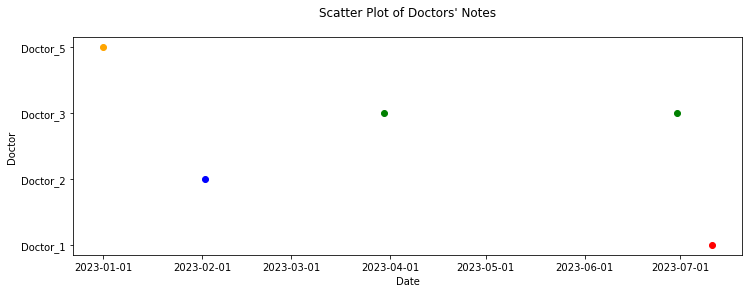

In [32]:
scatter_plot_show_dates_notes(df_doctors_notes)
multi_index_df

<div class="alert alert-block alert-success">
put the date next to each scatter point
</div> 

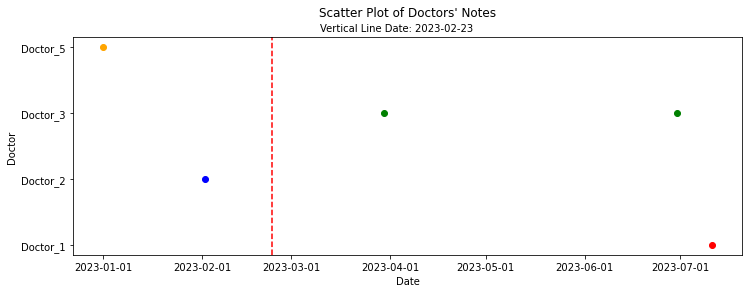

Index(['Doctor', 'Date'], dtype='object')


,Doctor,Date
0,Doctor_1,2023-07-11
1,Doctor_2,2023-02-02
2,Doctor_3,2023-03-30
3,Doctor_3,2023-06-30
4,Doctor_5,2023-01-01


In [33]:
date_string = "Feb 23 2023"
date_format = "%b %d %Y"

vertical_line_date = datetime.datetime.strptime(date_string, date_format)


scatter_plot_show_dates_notes(df_doctors_notes, vertical_line_date)
print(df_doctors_notes.columns)
df_doctors_notes = df_doctors_notes.sort_values(['Doctor','Date'], ascending=[True,True])
df_doctors_notes = df_doctors_notes.reset_index(drop=True)
df_doctors_notes

assert isinstance(vertical_line_date, datetime.datetime) , '"vertical_line_date" should be "datetime.datetime" '

# Find Notes After Date

generated_notes is the list of generated_notes


In [34]:
print('Notes are sorted by Date')
df_doctors_notes

Notes are sorted by Date


,Doctor,Date
0,Doctor_1,2023-07-11
1,Doctor_2,2023-02-02
2,Doctor_3,2023-03-30
3,Doctor_3,2023-06-30
4,Doctor_5,2023-01-01


In [35]:
def find_notes_after_date(doctors_list, date):
    notes_after_date = []
    for doctor in doctors_list:
        for note in doctor["Notes"]:
            if note["Date"] > date:
                note_info = {
                    "DATE": note["Date"],
                    "Name": doctor["Name"]
                }
                notes_after_date.append(note_info)
    return notes_after_date

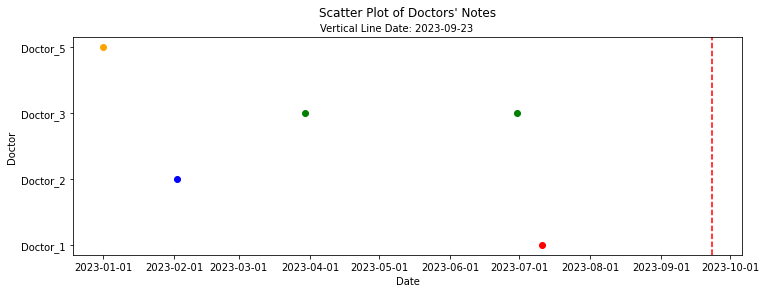

,Doctor,Date
0,Doctor_1,2023-07-11
1,Doctor_2,2023-02-02
2,Doctor_3,2023-03-30
3,Doctor_3,2023-06-30
4,Doctor_5,2023-01-01


In [36]:
date_string = "Sep 23 2023"
date_format = "%b %d %Y"

vertical_line_date = datetime.datetime.strptime(date_string, date_format)
scatter_plot_show_dates_notes(df_doctors_notes, vertical_line_date)
df_doctors_notes = df_doctors_notes.sort_values(['Doctor','Date'], ascending=[True,True])
df_doctors_notes = df_doctors_notes.reset_index(drop=True)
df_doctors_notes

## Find Notes From Doctor X


In [37]:
def find_notes_from_Doctor_X(list_of_doctors_notes,name_of_doctor):
    #  generated_notes
    for doctor in list_of_doctors_notes:
        # print(doctor)
        # print()
        if doctor["Name"] == name_of_doctor:
            list_of_notes_from_doctor = doctor["Notes"]
            num_of_notes = len(list_of_notes_from_doctor)
            # for note in list_of_notes_from_doctor:
            #     print(note)
            
            sorted_list_of_notes_from_doctor = sorted(list_of_notes_from_doctor, key=lambda x: x["Date"])

            for note in sorted_list_of_notes_from_doctor:
                for i in range(num_of_notes):
                    print(f"{sorted_list_of_notes_from_doctor[i]['Date']}" )
                    print(f"\t\t{sorted_list_of_notes_from_doctor[i]['Note_contents']}" )
                    
                    print()
                break
    return sorted_list_of_notes_from_doctor

In [38]:
dict_of_notes[name_of_doctor]

NameError: name 'name_of_doctor' is not defined

In [39]:
            
def find_notes_from_Doctor_X(dict_of_notes,
                             name_of_doctor):            
    list_of_notes_from_doctor = dict_of_notes[name_of_doctor]['Notes']
    num_of_notes = len(list_of_notes_from_doctor)
    # for note in list_of_notes_from_doctor:
    #     print(note)

    sorted_list_of_notes_from_doctor = sorted(list_of_notes_from_doctor, key=lambda x: x["Date"])

    for note in sorted_list_of_notes_from_doctor:
        for i in range(num_of_notes):
            print(f"{sorted_list_of_notes_from_doctor[i]['Date']}" )
            print(f"\t\t{sorted_list_of_notes_from_doctor[i]['Content']}" )

            print()
        break
    return sorted_list_of_notes_from_doctor

In [49]:
name_of_doctor = 'Doctor_5'
sorted_list_of_notes_from_doctor = \
    find_notes_from_Doctor_X(dict_of_notes,
                         name_of_doctor)       
# sorted_list_of_notes_from_doctor = find_notes_from_Doctor_X(dict_of_notes,name_of_doctor)
dates = [i['Date'] for i in sorted_list_of_notes_from_doctor]
date_of_last_note = np.max(dates)
print(f'Last Note by {name_of_doctor}:  {date_of_last_note}')
date_of_last_note
assert isinstance(date_of_last_note,datetime.date),f' {date_of_last_note} should be datetime.date '
print( 'include an assert that the latest date is ')

2023-01-01
		Name: John Smith
Doctor : Doctor_5
Age: 62
Gender: Male
Date of Visit: Jan 1, 2023

Last Note by Doctor_5:  2023-01-01


datetime.date(2023, 1, 1)

include an assert that the latest date is 


 <div class="alert alert-block alert-success">
    Now we have last date, find all notes after that date

</div>
## Concatenate Notes After Date

2023-01-01


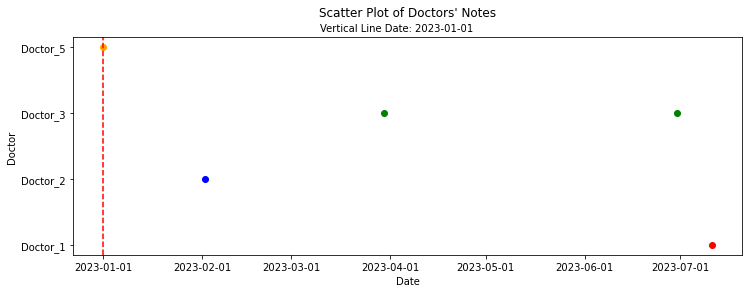

Index(['Doctor', 'Date'], dtype='object')


,Doctor,Date
0,Doctor_5,2023-01-01
1,Doctor_2,2023-02-02
2,Doctor_3,2023-03-30
3,Doctor_3,2023-06-30
4,Doctor_1,2023-07-11


In [50]:
# vertical_line_date = datetime.datetime.strptime(date_string, date_format)
vertical_line_date = date_of_last_note
print(vertical_line_date)

scatter_plot_show_dates_notes(df_doctors_notes, vertical_line_date)
print(df_doctors_notes.columns)
df_doctors_notes = df_doctors_notes.sort_values(['Date'], ascending=[True])
df_doctors_notes = df_doctors_notes.reset_index(drop=True)
df_doctors_notes

In [51]:
mask = df_doctors_notes['Date'] > date_of_last_note
df_doctors_notes[mask] 

,Doctor,Date
1,Doctor_2,2023-02-02
2,Doctor_3,2023-03-30
3,Doctor_3,2023-06-30
4,Doctor_1,2023-07-11


In [52]:
# import datetime

def concatenate_notes_after_date(data, after_date):
    concatenated_string = ""
    delimiter = '#####'
    sorted_notes = []
    
    for doctor in data:
        doctor_name = doctor['Name']
        for note in doctor['Notes']:
            note_date = note['Date']
            note_contents = note['Contents']
            
            if note_date > after_date:
                sorted_notes.append((note_date, doctor_name, note_contents))
    
    sorted_notes.sort(key=lambda x: x[0])  # Sort the notes by date
    
    for note_date, doctor_name, note_contents in sorted_notes:
        concatenated_string += f"{delimiter}{note_date}{delimiter}{doctor_name}{delimiter}{note_contents}\n"
    
    return concatenated_string

In [53]:
   
    
#     for doctor in data.items():
#         doctor_name = doctor['Name']
#         for note in doctor['Notes']:
#             note_date = note['Date']
#             note_contents = note['Note_contents']
            
#             if note_date > after_date:
#                 sorted_notes.append((note_date, doctor_name, note_contents))
    
#     sorted_notes.sort(key=lambda x: x[0])  # Sort the notes by date
    
#     for note_date, doctor_name, note_contents in sorted_notes:
#         concatenated_string += f"{delimiter}{note_date}{delimiter}{doctor_name}{delimiter}{note_contents}\n"
    
#     return concatenated_string

In [54]:
# import datetime

def concatenate_notes_after_date(data, after_date):
    # data is a dictof all the notes
    # we could just go throuh the df for dates and then would not need to sort
    
    
    concatenated_string = ""
    delimiter = '#####'
    sorted_notes = []
    
    for doctor,value  in dict_of_notes.items():
        print(doctor)
        num_of_notes = len(dict_of_notes[doctor]['Notes'])
        for a_note in dict_of_notes[doctor]['Notes']:
            print(a_note['Date'])
            print(f"\t\tThe Note:\n{a_note['Content']}")
            note_date = a_note['Date']
            note_contents = a_note['Content']
            
            if note_date > after_date:
                sorted_notes.append((note_date, doctor, note_contents))
    
            print('---------------------------------------------------------------')

        
           
    
    
    
    sorted_notes.sort(key=lambda x: x[0])  # Sort the notes by date

    for note_date, doctor_name, note_contents in sorted_notes:
        concatenated_string += f"{delimiter}{note_date}{delimiter}{doctor_name}{delimiter}{note_contents}\n"

    return concatenated_string


In [55]:
# for doctor,value  in dict_of_notes.items():
#     print(doctor)
#     num_of_notes = len(dict_of_notes[doctor]['notes'])
#     for a_note in dict_of_notes[doctor]['notes']:
#         print(a_note['date'])
#         print(f"\t\tThe Note:\n{a_note['content']}")
#         print('---------------------------------------------------------------')
        

Last note from Doctor_5 was:  2023-01-01
Notes since that time
Doctor_2
2023-02-02
		The Note:
Name: John Smith
Doctor : Doctor_2
Age: 62
Gender: Male
Date of Visit: Feb 2, 2023
---------------------------------------------------------------
Doctor_3
2023-03-30
		The Note:
Name: John Smith
Doctor : Doctor_3
Age: 62
Gender: Male
Date of Visit: Mar 30, 2023
---------------------------------------------------------------
2023-06-30
		The Note:
Name: John Smith
Doctor : Doctor_3
Age: 62
Gender: Male
Date of Visit: Jun 30, 2023
---------------------------------------------------------------
Doctor_5
2023-01-01
		The Note:
Name: John Smith
Doctor : Doctor_5
Age: 62
Gender: Male
Date of Visit: Jan 1, 2023
---------------------------------------------------------------
Doctor_1
2023-07-11
		The Note:
Name: John Smith
Doctor : Doctor_1
Age: 62
Gender: Male
Date of Visit: Jul 11, 2023
---------------------------------------------------------------
#####2023-02-02#####Doctor_2#####Name: John Smit

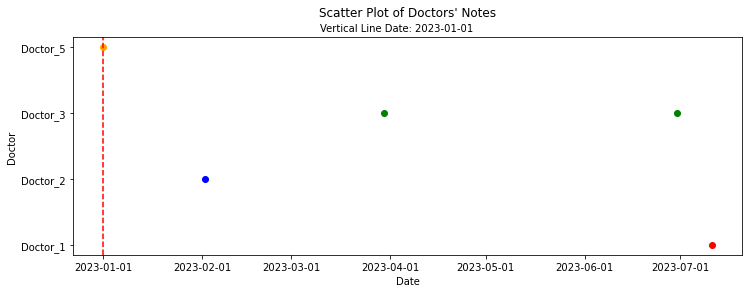

In [57]:
# Example usage:
print(f'Last note from {name_of_doctor} was:  {date_of_last_note}')
print(f'Notes since that time')
after_date = date_of_last_note #datetime.date(2023, 3, 15)  # Specify the date after which notes should be concatenated
notes_string = concatenate_notes_after_date(dict_of_notes, after_date)
print(notes_string)
vertical_line_date = after_date # datetime.datetime.strptime(after_date, date_format)
# print(vertical_line_date)

scatter_plot_show_dates_notes(df_doctors_notes, vertical_line_date)

In [58]:
print(notes_string)
print()
notes_string

#####2023-02-02#####Doctor_2#####Name: John Smith
Doctor : Doctor_2
Age: 62
Gender: Male
Date of Visit: Feb 2, 2023
#####2023-03-30#####Doctor_3#####Name: John Smith
Doctor : Doctor_3
Age: 62
Gender: Male
Date of Visit: Mar 30, 2023
#####2023-06-30#####Doctor_3#####Name: John Smith
Doctor : Doctor_3
Age: 62
Gender: Male
Date of Visit: Jun 30, 2023
#####2023-07-11#####Doctor_1#####Name: John Smith
Doctor : Doctor_1
Age: 62
Gender: Male
Date of Visit: Jul 11, 2023




'#####2023-02-02#####Doctor_2#####Name: John Smith\nDoctor : Doctor_2\nAge: 62\nGender: Male\nDate of Visit: Feb 2, 2023\n#####2023-03-30#####Doctor_3#####Name: John Smith\nDoctor : Doctor_3\nAge: 62\nGender: Male\nDate of Visit: Mar 30, 2023\n#####2023-06-30#####Doctor_3#####Name: John Smith\nDoctor : Doctor_3\nAge: 62\nGender: Male\nDate of Visit: Jun 30, 2023\n#####2023-07-11#####Doctor_1#####Name: John Smith\nDoctor : Doctor_1\nAge: 62\nGender: Male\nDate of Visit: Jul 11, 2023\n'

# AT THIS POINT - We start with chatGPT API
**At this point:**  
We have determined the date of the last note by the doctor in question and have the notes that follow that.



In [59]:
new_notes_string = notes_string.replace('#####',"####")
new_notes_string

'####2023-02-02####Doctor_2####Name: John Smith\nDoctor : Doctor_2\nAge: 62\nGender: Male\nDate of Visit: Feb 2, 2023\n####2023-03-30####Doctor_3####Name: John Smith\nDoctor : Doctor_3\nAge: 62\nGender: Male\nDate of Visit: Mar 30, 2023\n####2023-06-30####Doctor_3####Name: John Smith\nDoctor : Doctor_3\nAge: 62\nGender: Male\nDate of Visit: Jun 30, 2023\n####2023-07-11####Doctor_1####Name: John Smith\nDoctor : Doctor_1\nAge: 62\nGender: Male\nDate of Visit: Jul 11, 2023\n'

In [60]:

url_chatGPT_usage = 'https://platform.openai.com/account/usage'
webbrowser.open_new(url_chatGPT_usage)


True


Acting as a medical record abstractor, Your task is to extract relevant information from a series of clinical notes written by different doctors on different visits to the healht center.

From the compilation of notes below, delimited by triple quotes extract the information relevant to the patient's condition. 

List the dates of visits in chronological order and 
include a summary of the visit including the date , which doctor was present and what was the diagnosis
 in the following format:

Visit # 1 - include the date
    Doctor:
    Diagnosis:
    Medications:

Visit # 2 - include the date
    Doctor:
    Diagnosis:
    Medications:
Visit # N - include the date
    Doctor:
    Diagnosis:
    Medications:

2023-01-01


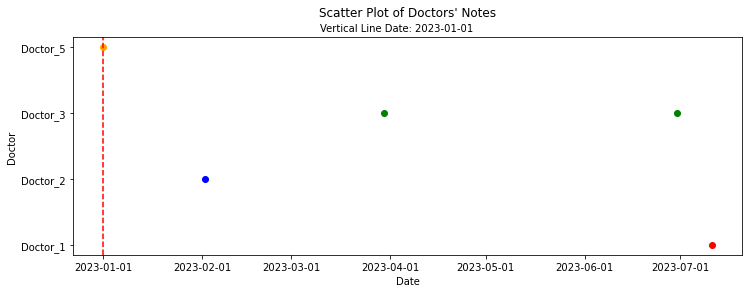

Index(['Doctor', 'Date'], dtype='object')


,Doctor,Date
1,Doctor_2,2023-02-02
2,Doctor_3,2023-03-30
3,Doctor_3,2023-06-30
4,Doctor_1,2023-07-11


START QUERY
Visit # 1 - Feb 2, 2023
    Doctor: Doctor_2
    Diagnosis: 
    Medications: 

Visit # 2 - Mar 30, 2023
    Doctor: Doctor_3
    Diagnosis: 
    Medications: 

Visit # 3 - Jun 30, 2023
    Doctor: Doctor_3
    Diagnosis: 
    Medications: 

Visit # 4 - Jul 11, 2023
    Doctor: Doctor_1
    Diagnosis: 
    Medications: 


Time to Execute Task
Start  : 18:25:53
End    : 18:25:56
Elapsed: 3.27 seconds


Token Usage:
Cost to run query is based on token usage, which is $0.002 / 1K tokens
Completion tokens:        115
Prompt tokens    :        338
Total tokens     :        453
Cost to run query: $0.001


In [61]:
delimiter = '####'
prompt_1 = f"""
Acting as a medical record abstractor, \
Your task is to extract relevant information from a series of clinical notes written \
by different doctors on different visits to the healht center.

From the compilation of notes below, \
delimited by triple quotes extract the information relevant to the patient's condition. 

List the dates of visits in chronological order and 
include a summary of the visit including the date , which doctor was present and what was the diagnosis
 in the following format:

Visit # 1 - include the date
    Doctor:
    Diagnosis:
    Medications:

Visit # 2 - include the date
    Doctor:
    Diagnosis:
    Medications:
Visit # N - include the date
    Doctor:
    Diagnosis:
    Medications:
Review: ```{new_notes_string}```

    """

print(prompt_1.split('Review')[0])

# vertical_line_date = datetime.datetime.strptime(date_string, date_format)
vertical_line_date = date_of_last_note
print(vertical_line_date)

scatter_plot_show_dates_notes(df_doctors_notes, vertical_line_date)
print(df_doctors_notes.columns)
df_doctors_notes = df_doctors_notes.sort_values(['Date'], ascending=[True])
df_doctors_notes = df_doctors_notes.reset_index(drop=True)
mask = df_doctors_notes['Date'] > date_of_last_note
df_doctors_notes[mask]
response = get_completion_from_messages_FULL_and_costs(prompt_1)

In [62]:
# new_notes_string = new_notes_string.replace('COPD',"Patient was seen for an exacerbations of her COPD. She continues on her medication's, which are albuterol, \
# and another medication, which she cannot recall the name for.")
# new_notes_string

In [63]:
# new_notes_string = "####2023-05-10 Doctor_3####Diabetes\n####2023-05-24 \
# Doctor_4####Patient was seen for an exacerbations of her COPD. \
# She continues on her medication's, which are albuterol, and another medication, \
# which she cannot recall the name for.\n####2023-05-31 \
# Doctor_5####HTN\n####2023-06-01  Doctor_2####Hyperlipidemia\n####2023-06-16  Doctor_4####Diabetes\n"

# List Dates of Visits and with Whom 


Acting as a medical record abstractor, Your task is to extract relevant information from a series of clinical notes written by different doctors on different visits to the healht center.

From the compilation of notes below, delimited by triple quotes extract the information relevant to the patient's condition. 

List the dates of visits in chronological order and display which doctor saw the patient 


2023-01-01


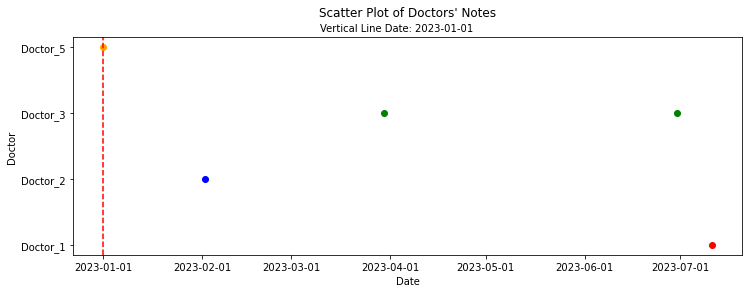

Index(['Doctor', 'Date'], dtype='object')


,Doctor,Date
1,Doctor_2,2023-02-02
2,Doctor_3,2023-03-30
3,Doctor_3,2023-06-30
4,Doctor_1,2023-07-11


START QUERY
Dates of visits in chronological order and the doctor who saw the patient:

1. Feb 2, 2023 - Doctor_2
2. Mar 30, 2023 - Doctor_3
3. Jun 30, 2023 - Doctor_3
4. Jul 11, 2023 - Doctor_1 


Time to Execute Task
Start  : 18:26:45
End    : 18:26:47
Elapsed: 1.804 seconds


Token Usage:
Cost to run query is based on token usage, which is $0.002 / 1K tokens
Completion tokens:         69
Prompt tokens    :        263
Total tokens     :        332
Cost to run query: $0.001


In [65]:
delimiter = '####'
prompt_2 = f"""
Acting as a medical record abstractor, \
Your task is to extract relevant information from a series of clinical notes written \
by different doctors on different visits to the healht center.

From the compilation of notes below, \
delimited by triple quotes extract the information relevant to the patient's condition. 

List the dates of visits in chronological order and display which doctor saw the patient 

Review: ```{new_notes_string}```

    """

print(prompt_2.split('Review')[0])

# vertical_line_date = datetime.datetime.strptime(date_string, date_format)
vertical_line_date = date_of_last_note
print(vertical_line_date)

scatter_plot_show_dates_notes(df_doctors_notes, vertical_line_date)
print(df_doctors_notes.columns)
df_doctors_notes = df_doctors_notes.sort_values(['Date'], ascending=[True])
df_doctors_notes = df_doctors_notes.reset_index(drop=True)
mask = df_doctors_notes['Date'] > date_of_last_note
df_doctors_notes[mask]
response = get_completion_from_messages_FULL_and_costs(prompt_2)

# How many visit with each Doctor ?


List the doctors who saw the patient and how many visits with each doctor.




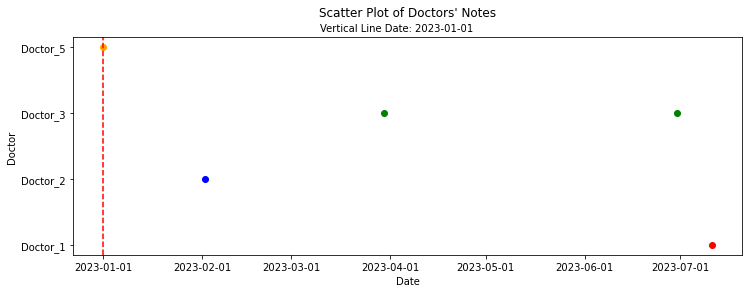

START QUERY
The patient, John Smith, had visits with the following doctors:

1. Doctor_2 - 1 visit
2. Doctor_3 - 2 visits
3. Doctor_1 - 1 visit 


Time to Execute Task
Start  : 18:32:38
End    : 18:32:40
Elapsed: 1.316 seconds


Token Usage:
Cost to run query is based on token usage, which is $0.002 / 1K tokens
Completion tokens:         42
Prompt tokens    :        263
Total tokens     :        305
Cost to run query: $0.001


In [72]:
delimiter = '####'
start_query_delimiter  = '---'
prompt_3 = f"""
Acting as a medical record abstractor, \
Your task is to extract relevant information from a series of clinical notes written \
by different doctors on different visits to the healht center.

From the compilation of notes below, \
delimited by triple quotes extract the information relevant to the patient's condition. 

{start_query_delimiter}
List the doctors who saw the patient and how many visits with each doctor.

Review: ```{new_notes_string}```

    """

print(prompt_3.split(start_query_delimiter)[1].split('Review')[0])

# vertical_line_date = datetime.datetime.strptime(date_string, date_format)
vertical_line_date = date_of_last_note
# print(vertical_line_date)

scatter_plot_show_dates_notes(df_doctors_notes, vertical_line_date)
# print(df_doctors_notes.columns)
df_doctors_notes = df_doctors_notes.sort_values(['Date'], ascending=[True])
df_doctors_notes = df_doctors_notes.reset_index(drop=True)

response = get_completion_from_messages_FULL_and_costs(prompt_3)

# CAn stop her

## Generate Random Dates

In [120]:
import random
from datetime import datetime, timedelta

def generate_random_dates(num_dates, start_date, end_date):
    date_format = "%b %d %Y"
    date_list = []
    start_date = datetime.strptime(start_date, date_format)
    today = datetime.today()
    formatted_date = today.strftime("%b %d %Y")
    end_date = formatted_date
    end_date =   datetime.strptime(end_date, date_format)

    for _ in range(num_dates):
        random_date = start_date + timedelta(days=random.randint(0, (end_date - start_date).days))
        date_list.append(random_date.strftime(date_format))

    return date_list

# Example usage
random_dates = generate_random_dates(3, "Jan 1 2023", "Dec 31 2023")
print("Random Dates:", random_dates)


Random Dates: ['Jun 05 2023', 'Jun 12 2023', 'Feb 13 2023']


In [154]:
# generated_notes

[{'Name': 'Doctor_1',
  'Notes': [{'Date': datetime.date(2023, 1, 29), 'Note_contents': 'CHF'},
   {'Date': datetime.date(2023, 3, 12), 'Note_contents': 'COPD'},
   {'Date': datetime.date(2023, 2, 27), 'Note_contents': 'COPD'},
   {'Date': datetime.date(2023, 1, 27), 'Note_contents': 'Diabetes'}]},
 {'Name': 'Doctor_2',
  'Notes': [{'Date': datetime.date(2023, 6, 1),
    'Note_contents': 'Hyperlipidemia'},
   {'Date': datetime.date(2023, 1, 9), 'Note_contents': 'CHF'}]},
 {'Name': 'Doctor_3',
  'Notes': [{'Date': datetime.date(2023, 2, 25), 'Note_contents': 'COPD'},
   {'Date': datetime.date(2023, 5, 10), 'Note_contents': 'Diabetes'}]},
 {'Name': 'Doctor_4',
  'Notes': [{'Date': datetime.date(2023, 5, 24), 'Note_contents': 'COPD'},
   {'Date': datetime.date(2023, 6, 16), 'Note_contents': 'Diabetes'}]},
 {'Name': 'Doctor_5',
  'Notes': [{'Date': datetime.date(2023, 2, 26),
    'Note_contents': 'Hyperlipidemia'},
   {'Date': datetime.date(2023, 5, 31), 'Note_contents': 'HTN'},
   {'Date'

In [25]:
# def find_notes_after_date(doctors_notes, 
#                           name_of_doctor, 
#                           date_of_note):
#     dates_after_note = []
#     for doctor in doctors_notes:
#         if doctor["Name"] == name_of_doctor:
#             for note in doctor["Notes"]:
#                 if note["Date"] > date_of_note:
#                     dates_after_note.append(note["Date"])
#     return dates_after_note


def find_notes_after_date_by_specific_doctor(doctors_notes, 
                                             name_of_doctor, 
                                             date_of_note):
    dates_of_note_after_given_date = []
    for doctor in doctors_notes:
        if doctor["Name"] == name_of_doctor:
            for note in doctor["Notes"]:
                if note["Date"] > date_of_note:
                    dates_of_note_after_given_date.append(note["Date"])
    return dates_of_note_after_given_date

## Find Notes From Doctor X


In [3]:
def find_notes_from_Doctor_X(list_of_doctors_notes,name_of_doctor):
    #  generated_notes
    for doctor in list_of_doctors_notes:
        # print(doctor)
        # print()
        if doctor["Name"] == name_of_doctor:
            list_of_notes_from_doctor = doctor["Notes"]
            num_of_notes = len(list_of_notes_from_doctor)
            # for note in list_of_notes_from_doctor:
            #     print(note)
            
            sorted_list_of_notes_from_doctor = sorted(list_of_notes_from_doctor, key=lambda x: x["Date"])

            for note in sorted_list_of_notes_from_doctor:
                for i in range(num_of_notes):
                    print(f"{sorted_list_of_notes_from_doctor[i]['Date']}" )
                    print(f"\t\t{sorted_list_of_notes_from_doctor[i]['Note_contents']}" )
                    
                    print()
                break
    return sorted_list_of_notes_from_doctor

In [4]:
name_of_doctor = 'Doctor_1'
sorted_list_of_notes_from_doctor = find_notes_from_Doctor_X(generated_notes,name_of_doctor)
dates = [i['Date'] for i in sorted_list_of_notes_from_doctor]
date_of_last_note = np.max(dates)
print(f'Last Note by {name_of_doctor}:  {date_of_last_note}')
type(date_of_last_note)
type(dates[0])
sorted_list_of_notes_from_doctor

NameError: name 'generated_notes' is not defined

In [5]:
generated_notes

NameError: name 'generated_notes' is not defined

In [127]:
# import datetime

def concatenate_notes_after_date(data, after_date):
    concatenated_string = ""
    delimiter = '#####'
    sorted_notes = []
    
    for doctor in data:
        doctor_name = doctor['Name']
        for note in doctor['Notes']:
            note_date = note['Date']
            note_contents = note['Note_contents']
            
            if note_date > after_date:
                sorted_notes.append((note_date, doctor_name, note_contents))
    
    sorted_notes.sort(key=lambda x: x[0])  # Sort the notes by date
    
    for note_date, doctor_name, note_contents in sorted_notes:
        concatenated_string += f"{delimiter}{note_date}{delimiter}{doctor_name}{delimiter}{note_contents}\n"
    
    return concatenated_string

# Example usage:
after_date = date_of_last_note #datetime.date(2023, 3, 15)  # Specify the date after which notes should be concatenated
notes_string = concatenate_notes_after_date(generated_notes, after_date)
print(notes_string)
vertical_line_date = datetime.datetime.strptime(after_date, date_format)
# print(vertical_line_date)

scatter_plot_show_dates_notes(df_doctor_notes, vertical_line_date)


#####2023-05-10#####Doctor_3#####Diabetes
#####2023-05-24#####Doctor_4#####COPD
#####2023-05-31#####Doctor_5#####HTN
#####2023-06-01#####Doctor_2#####Hyperlipidemia
#####2023-06-16#####Doctor_4#####Diabetes



TypeError: strptime() argument 1 must be str, not datetime.date

In [353]:
import datetime

def concatenate_notes_after_date(data, after_date):
    concatenated_string = ""
    delimiter = '#####'
    sorted_notes = []
    
    for doctor in data:
        doctor_name = doctor['Name']
        for note in doctor['Notes']:
            note_date = note['Date']
            note_contents = note['Note_contents']
            
            if note_date > after_date:
                sorted_notes.append((note_date, doctor_name, note_contents))
    
    sorted_notes.sort(key=lambda x: x[0])  # Sort the notes by date
    
    for note_date, doctor_name, note_contents in sorted_notes:
        concatenated_string += f"{delimiter}{note_date}{delimiter}{doctor_name}{delimiter}{note_contents}\n"
    
    return concatenated_string

# Example usage:
after_date = datetime.date(2023, 3, 15)  # Specify the date after which notes should be concatenated
notes_string = concatenate_notes_after_date(generated_notes, after_date)
print(notes_string)


#####2023-03-23#####Doctor_4#####Diabetes
#####2023-04-24#####Doctor_1#####Diabetes
#####2023-05-02#####Doctor_2#####Hyperlipidemia
#####2023-05-05#####Doctor_3#####COPD
#####2023-05-10#####Doctor_1#####Hyperlipidemia
#####2023-05-21#####Doctor_1#####Hyperlipidemia



{'DATE': datetime.date(2023, 3, 6), 'Name': 'Doctor_2'}
{'DATE': datetime.date(2023, 3, 9), 'Name': 'Doctor_4'}
{'DATE': datetime.date(2023, 3, 10), 'Name': 'Doctor_2'}
{'DATE': datetime.date(2023, 3, 17), 'Name': 'Doctor_3'}
{'DATE': datetime.date(2023, 4, 9), 'Name': 'Doctor_1'}
{'DATE': datetime.date(2023, 6, 2), 'Name': 'Doctor_1'}
{'DATE': datetime.date(2023, 6, 2), 'Name': 'Doctor_1'}
{'DATE': datetime.date(2023, 6, 10), 'Name': 'Doctor_5'}
{'DATE': datetime.date(2023, 6, 13), 'Name': 'Doctor_5'}
{'DATE': datetime.date(2023, 6, 24), 'Name': 'Doctor_2'}


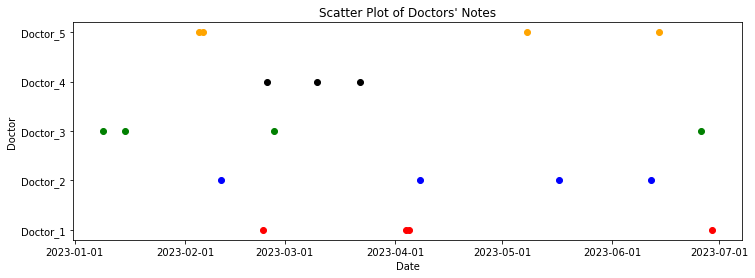

In [346]:
# def create_scatter_plot(dataframe, vertical_line_date=None):
#     plt.figure(figsize=(8, 6))

#     ax = plt.gca()  # Get the current axes
#     ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Set the date format

#     for doctor, color in color_map.items():
#         doctor_data = dataframe[dataframe["Doctor"] == doctor]
#         dates = pd.to_datetime(doctor_data["Date"])
#         plt.scatter(dates, [doctor] * len(dates), color=color, label=doctor)

#     if vertical_line_date is not None:
#         plt.axvline(x=vertical_line_date, color='red', linestyle='--', label='Vertical Line')

#     plt.xlabel("Date")
#     plt.ylabel("Doctor")
#     plt.title("Scatter Plot of Doctors' Notes")
#     plt.legend()
#     plt.show()

# # Example usage:
# # Assuming df is the dataframe consisting of "Doctor" and "Date" columns
# vertical_date = pd.to_datetime("2023-04-15")  # Specify the date for the vertical line
# create_scatter_plot(df_doctor_notes, vertical_line_date=vertical_date)


In [ ]:
scatter_plot_show_dates_notes(df_doctor_notes)

name_of_doctor = 'Doctor_5'
date_of_note = datetime.date(2023, 1, 2)

for  name_of_doctor in list_of_doctors:
    print(f'\nDoctor {name_of_doctor}')
    dates_of_note_after_given_date = \
    find_notes_after_date_by_specific_doctor(generated_notes, name_of_doctor, date_of_note)
    dates_of_note_after_given_date.sort()
    dates_of_note_after_given_date    
    for date in dates_of_note_after_given_date:
        print(date)

In [187]:
for doctor in generated_notes:
    print(doctor['Name'])
    for note in doctor['Notes']:
        print(note)

Doctor_1
{'Date': datetime.date(2023, 4, 19), 'Note_contents': 'Hyperlipidemia'}
{'Date': datetime.date(2023, 4, 30), 'Note_contents': 'CHF'}
{'Date': datetime.date(2023, 6, 22), 'Note_contents': 'CHF'}
Doctor_2
{'Date': datetime.date(2023, 4, 14), 'Note_contents': 'HTN'}
{'Date': datetime.date(2023, 1, 28), 'Note_contents': 'COPD'}
Doctor_3
{'Date': datetime.date(2023, 2, 18), 'Note_contents': 'Diabetes'}
{'Date': datetime.date(2023, 4, 25), 'Note_contents': 'COPD'}
Doctor_4
{'Date': datetime.date(2023, 2, 16), 'Note_contents': 'HTN'}
{'Date': datetime.date(2023, 4, 29), 'Note_contents': 'COPD'}
{'Date': datetime.date(2023, 1, 20), 'Note_contents': 'Hyperlipidemia'}
Doctor_5
{'Date': datetime.date(2023, 1, 26), 'Note_contents': 'CHF'}
{'Date': datetime.date(2023, 6, 16), 'Note_contents': 'Diabetes'}
{'Date': datetime.date(2023, 1, 4), 'Note_contents': 'CHF'}
{'Date': datetime.date(2023, 3, 2), 'Note_contents': 'COPD'}


In [182]:
import random

def generate_doctors(num_doctors):
    doctors = []
    names_set = set()

    while len(doctors) < num_doctors:
        doctor_number = random.randint(1, num_doctors)
        name = f"Doctor_{doctor_number}"
        if name not in names_set:
            names_set.add(name)
            doctor = {
                "Name": name,
                "Notes": []
            }
            doctors.append(doctor)

    return doctors

# Example usage
num_doctors = 5
doctors_list = generate_doctors(num_doctors)
print(doctors_list)


[{'Name': 'Doctor_1', 'Notes': []}, {'Name': 'Doctor_3', 'Notes': []}, {'Name': 'Doctor_5', 'Notes': []}, {'Name': 'Doctor_2', 'Notes': []}, {'Name': 'Doctor_4', 'Notes': []}]


In [183]:
def find_index_by_name(doctors_list, name):
    for index, doctor in enumerate(doctors_list):
        if doctor["Name"] == name:
            return index
    return -1
name = 'Doctor_3'
index = find_index_by_name(doctors_list, name)

if index != -1:
    print(f"Index of {name}: {index}")
else:
    print(f"{name} not found in the list.")


Index of Doctor_3: 1


**Let's start off with a dict of doctors**

In [ ]:
dict_of_my_generated_notes = {}
list_of_dict_of_my_generated_notes = []
# dict_of_my_generated_notes['Name']

In [184]:
# take some dates and create some notes
list_current_notes = []
for date in ['Jan 30 2023','Feb 2 2023','Mar 30 2023']:
    
    parsed_date = parse_date(date) #datetime.date format
    
    note_date = parsed_date
    date_for_file_name = parsed_date.strftime('%Y_%m_%d')
    
    print(date_for_file_name , date_for_file_name.replace('_','-')) # replacing name to use in file name
    working_note = current_note.replace('Feb 11',date.split(' 2023')[0]) # replace date of visit
    
    random_num_for_doctor = random.randint(1, 5)  # Generate a random number for doctor
    replacement_doctor = 'Doctor_' + str(random_num_for_doctor)
    print(f'found {doctor_of_visit } replacing with {random_num_for_doctor}')
    # for i in range(len(doctors_list)): # can do better her
    #     if doctors_list[i] == 'Doctor_' + random_num_for_doctor:
    #         doctors_list[i]['']
    working_note = current_note.replace(doctor_of_visit, replacement_doctor   ) # replace doctor number in note
       
    
    index_in_doctors_list = find_index_by_name(doctors_list, replacement_doctor)
    'index', index_in_doctors_list
    print(doctors_list[index_in_doctors_list]['Name'])
    
    
    # Add note to Notes
    
    
    doctors_list[index_in_doctors_list]['Notes']= {'Note_contents': '','Date': None}
    doctors_list[index_in_doctors_list]['Notes']['Note_contents'] = working_note
    doctors_list[index_in_doctors_list]['Notes']['Date'] = note_date
    
    file_name_to_write = patient_name + '_' + date_for_file_name + '.txt'
    file_name_to_write
    with open( os.path.join(dir_pt_notes,file_name_to_write), 'w') as file:
        file.write(working_note)
# doctors_list

2023_01_30 2023-01-30
found Doctor_1 replacing with 5


('index', 2)

Doctor_5


'John Smith_2023_01_30.txt'

4070

2023_02_02 2023-02-02
found Doctor_1 replacing with 2


('index', 3)

Doctor_2


'John Smith_2023_02_02.txt'

4070

2023_03_30 2023-03-30
found Doctor_1 replacing with 3


('index', 1)

Doctor_3


'John Smith_2023_03_30.txt'

4070


# End

In [ ]:
dict_of_notes.keys()
def get_values_by_key(data_list, key):
    print(data_list)
    values = []
    for item in data_list:
        print(f'item {item}')
        if key in item:
            values.append(item[key])
    return values



data_list = [
    {'Name': 'John', 'Age': 30},
    {'Name': 'Jane', 'Age': 25},
    {'Name': 'Bob', 'Age': 40},
    {'Name': 'Alice', 'Age': 35},
    {'Name': 'Charlie'}
]

key = 'Name'
# values = get_values_by_key(data_list, key)
values = get_values_by_key(list_of_pt_notes, key)

if len(values) > 0:
    print(f"Values for key '{key}': {values}")
else:
    print(f"No values found for key '{key}'")


In [10]:
generated_notes = generate_list_of_doctors_notes()
generated_notes

[{'Name': 'Doctor_1',
  'Notes': [{'Date': datetime.date(2023, 1, 29), 'Note_contents': 'CHF'},
   {'Date': datetime.date(2023, 3, 12), 'Note_contents': 'COPD'},
   {'Date': datetime.date(2023, 2, 27), 'Note_contents': 'COPD'},
   {'Date': datetime.date(2023, 1, 27), 'Note_contents': 'Diabetes'}]},
 {'Name': 'Doctor_2',
  'Notes': [{'Date': datetime.date(2023, 6, 1),
    'Note_contents': 'Hyperlipidemia'},
   {'Date': datetime.date(2023, 1, 9), 'Note_contents': 'CHF'}]},
 {'Name': 'Doctor_3',
  'Notes': [{'Date': datetime.date(2023, 2, 25), 'Note_contents': 'COPD'},
   {'Date': datetime.date(2023, 5, 10), 'Note_contents': 'Diabetes'}]},
 {'Name': 'Doctor_4',
  'Notes': [{'Date': datetime.date(2023, 5, 24), 'Note_contents': 'COPD'},
   {'Date': datetime.date(2023, 6, 16), 'Note_contents': 'Diabetes'}]},
 {'Name': 'Doctor_5',
  'Notes': [{'Date': datetime.date(2023, 2, 26),
    'Note_contents': 'Hyperlipidemia'},
   {'Date': datetime.date(2023, 5, 31), 'Note_contents': 'HTN'},
   {'Date'